<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(3_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,30.489364,85.826487,85.363840,-110.150721,101.528971,547.096598,-445.567628
1,0.0,1.0,65.648008,26.294996,56.370679,-148.362027,9.951657,-177.030543,186.982200
2,0.0,2.0,94.286645,85.993817,95.186043,964.393373,1249.859879,298.440074,951.419805
3,0.0,3.0,54.554168,99.252643,62.528392,4567.359367,4793.694572,714.652222,4079.042350
4,0.0,4.0,87.090325,51.865125,35.089611,-457.488282,-273.443221,139.538005,-412.981225
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,42.542319,21.661909,68.837063,-193.359975,-50.318683,-25.228916,-25.089767
19996,999.0,16.0,27.882199,75.448024,89.977822,-1348.573723,-1145.265677,-703.020283,-442.245394
19997,999.0,17.0,29.240166,43.476382,59.761679,-612.631689,-470.153463,-203.309614,-266.843849
19998,999.0,18.0,36.095275,83.813001,64.319325,-2233.449963,-2039.222362,-213.662215,-1825.560147


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    30.489364  85.826487  ...  547.096598  -445.567628
      1.0    65.648008  26.294996  ... -177.030543   186.982200
      2.0    94.286645  85.993817  ...  298.440074   951.419805
      3.0    54.554168  99.252643  ...  714.652222  4079.042350
      4.0    87.090325  51.865125  ...  139.538005  -412.981225
...                ...        ...  ...         ...          ...
999.0 15.0   42.542319  21.661909  ...  -25.228916   -25.089767
      16.0   27.882199  75.448024  ... -703.020283  -442.245394
      17.0   29.240166  43.476382  ... -203.309614  -266.843849
      18.0   36.095275  83.813001  ... -213.662215 -1825.560147
      19.0   32.339959  31.585989  ... -182.142664   847.239492

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    30.489364  85.826487  ...  547.096598  -445.567628
      1.0    65.648008  26.294996  ... -177.030543   186.982200
      2.0    94.286645  85.993817  ...  298.440074   951.419805
      3.0    54.554168  99.252643  ...  714.652222  4079.042350
      4.0    87.090325  51.865125  ...  139.538005  -412.981225
...                ...        ...  ...         ...          ...
999.0 15.0   42.542319  21.661909  ...  -25.228916   -25.089767
      16.0   27.882199  75.448024  ... -703.020283  -442.245394
      17.0   29.240166  43.476382  ... -203.309614  -266.843849
      18.0   36.095275  83.813001  ... -213.662215 -1825.560147
      19.0   32.339959  31.585989  ... -182.142664   847.239492

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,30.489364,85.826487,85.363840,-110.150721,101.528971,547.096598,-445.567628
1,0.0,1.0,65.648008,26.294996,56.370679,-148.362027,9.951657,-177.030543,186.982200
2,0.0,2.0,94.286645,85.993817,95.186043,964.393373,1249.859879,298.440074,951.419805
3,0.0,3.0,54.554168,99.252643,62.528392,4567.359367,4793.694572,714.652222,4079.042350
4,0.0,4.0,87.090325,51.865125,35.089611,-457.488282,-273.443221,139.538005,-412.981225
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,42.542319,21.661909,68.837063,-193.359975,-50.318683,-25.228916,-25.089767
19996,999.0,16.0,27.882199,75.448024,89.977822,-1348.573723,-1145.265677,-703.020283,-442.245394
19997,999.0,17.0,29.240166,43.476382,59.761679,-612.631689,-470.153463,-203.309614,-266.843849
19998,999.0,18.0,36.095275,83.813001,64.319325,-2233.449963,-2039.222362,-213.662215,-1825.560147


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    30.489364  85.826487  ...  547.096598  -445.567628
      1.0    65.648008  26.294996  ... -177.030543   186.982200
      2.0    94.286645  85.993817  ...  298.440074   951.419805
      3.0    54.554168  99.252643  ...  714.652222  4079.042350
      4.0    87.090325  51.865125  ...  139.538005  -412.981225
...                ...        ...  ...         ...          ...
999.0 15.0   42.542319  21.661909  ...  -25.228916   -25.089767
      16.0   27.882199  75.448024  ... -703.020283  -442.245394
      17.0   29.240166  43.476382  ... -203.309614  -266.843849
      18.0   36.095275  83.813001  ... -213.662215 -1825.560147
      19.0   32.339959  31.585989  ... -182.142664   847.239492

[20000 rows x 7 columns]

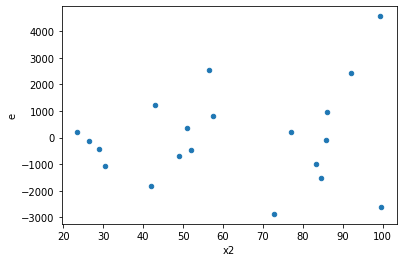

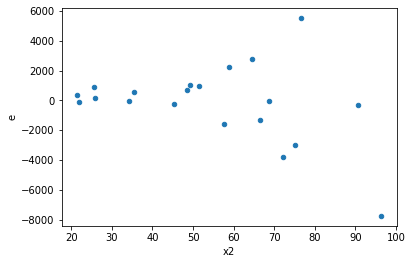

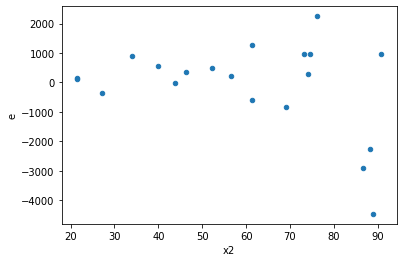

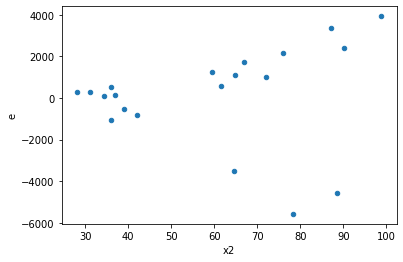

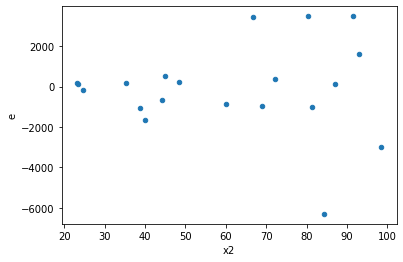

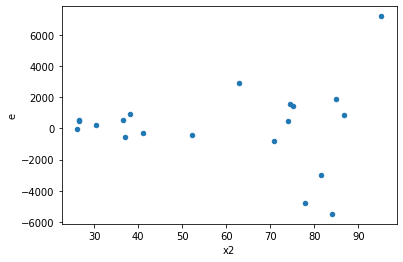

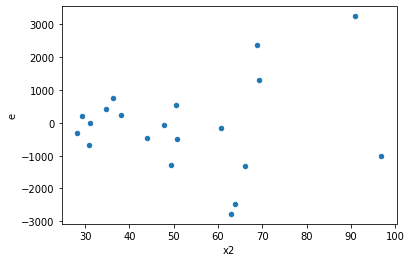

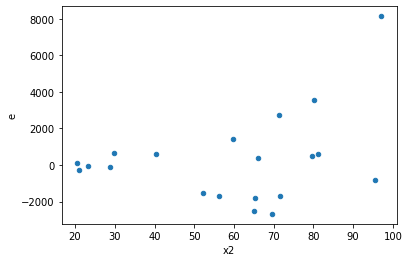

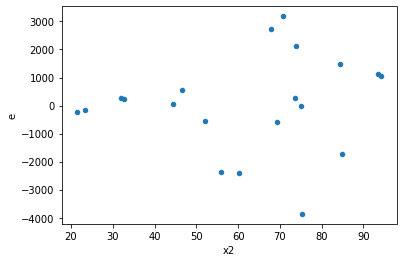

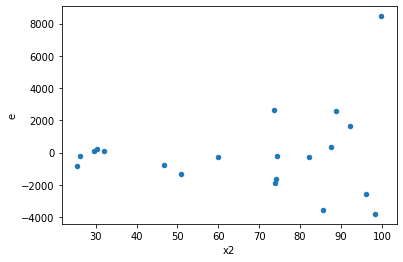

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,2.0,12.0,373776.73949410074,86441246.31639038,186888.36974705037,7203437.193032532,38.544063511187126,1.1945339601249216e-05,0.9999940273301994,5.972669800624608e-06,Reject001=0 : Heteroscedasticity
2.0,8.0,6.0,11095223.763569783,14147334.983291037,1386902.970446223,2357889.1638818397,1.7001111210564437,0.5341699230447516,0.7329150384776242,0.2670849615223758,Reject001=1 : Homoscedasticity
5.0,8.0,6.0,4606952.213934318,74157482.8099895,575869.0267417898,12359580.468331583,21.46248520824409,0.0014259110215943949,0.9992870444892028,0.0007129555107971974,Reject001=0 : Heteroscedasticity
7.0,7.0,7.0,18490295.907640506,65035116.60669155,2641470.8439486437,9290730.943813078,3.517256669744151,0.1190586256373043,0.9404706871813479,0.05952931281865215,Reject001=1 : Homoscedasticity
8.0,8.0,6.0,10981209.830776365,18810757.321510278,1372651.2288470457,3135126.220251713,2.2839933075243395,0.33005442734640056,0.8349727863267997,0.16502721367320028,Reject001=1 : Homoscedasticity
9.0,4.0,10.0,732473.2062480642,110266500.24060017,183118.30156201604,11026650.024060016,60.21599113797841,1.167664709589289e-06,0.9999994161676452,5.838323547946445e-07,Reject001=0 : Heteroscedasticity
10.0,11.0,3.0,9691067.304589676,14517699.674372155,881006.1185990614,4839233.224790718,5.492848599605486,0.18727795257734914,0.9063610237113254,0.09363897628867457,Reject001=1 : Homoscedasticity
13.0,5.0,9.0,2032116.435762869,21914473.996778898,406423.2871525738,2434941.555197655,5.991146748152655,0.020710961435947972,0.989644519282026,0.010355480717973986,Reject001=1 : Homoscedasticity
15.0,4.0,10.0,8507675.991065487,43496222.85136546,2126918.997766372,4349622.285136546,2.0450342912468185,0.3272605068846657,0.8363697465576672,0.16363025344233284,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,4.0,46653086.01160102,5622191.53762888,4665308.6011601025,1405547.88440722,0.30127650806587764,0.11274301321651228,Reject001=1 : Homoscedasticity
1.0,2.0,12.0,373776.73949410074,86441246.31639038,186888.36974705037,7203437.193032532,38.544063511187126,1.1945339601249216e-05,Reject001=0 : Heteroscedasticity
2.0,8.0,6.0,11095223.763569783,14147334.983291037,1386902.970446223,2357889.1638818397,1.7001111210564437,0.5341699230447516,Reject001=1 : Homoscedasticity
3.0,10.0,4.0,51907673.395432025,14095601.26862335,5190767.339543203,3523900.3171558375,0.6788784945745512,0.5630508062066353,Reject001=1 : Homoscedasticity
4.0,6.0,8.0,31579466.305808067,2864712.6999493246,5263244.384301345,358089.0874936656,0.06803580859017991,0.0040965032534971595,Reject001=0 : Heteroscedasticity
5.0,8.0,6.0,4606952.213934318,74157482.8099895,575869.0267417898,12359580.468331583,21.46248520824409,0.0014259110215943949,Reject001=0 : Heteroscedasticity
6.0,8.0,6.0,16000872.076403549,1591880.9742761794,2000109.0095504436,265313.4957126966,0.132649517824196,0.011854095241217515,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,18490295.907640506,65035116.60669155,2641470.8439486437,9290730.943813078,3.517256669744151,0.1190586256373043,Reject001=1 : Homoscedasticity
8.0,8.0,6.0,10981209.830776365,18810757.321510278,1372651.2288470457,3135126.220251713,2.2839933075243395,0.33005442734640056,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      707
Reject001=0 : Heteroscedasticity    293
Name: Result_test, dtype: int64